# Non-correspondences

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
os.chdir('../')
print(os.getcwd())

/home/yoyee/Documents/deepSfm


/home/yoyee/Documents/deepSfm


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# import dense_correspondence_manipulation.utils.utils as utils
# utils.add_dense_correspondence_to_python_path()
import utils.correspondence_tools.correspondence_plotter as correspondence_plotter
import utils.correspondence_tools.correspondence_finder as correspondence_finder
# from dense_correspondence.dataset.spartan_dataset_masked import SpartanDataset
import os
import numpy as np
import torch
import time


In [3]:
def uvto1d(points, H):
    # assert points.dim == 2
#     print("points: ", points[0])
#     print("H: ", H)
    return points[0]*H + points[1]

H, W = 30, 40
uv_a_matches = (torch.tensor(np.array([1]), dtype=torch.float32), 
                torch.tensor(np.array([1]), dtype=torch.float32))
matches_a = uv_a_matches[0]*H + uv_a_matches[1]
matches_a = uvto1d(uv_a_matches, H)
print("uv_a_matches: ", uv_a_matches)
print("matches_a: ", matches_a)

uv_b_matches = (torch.tensor(np.array([1]), dtype=torch.float32), 
                torch.tensor(np.array([1]), dtype=torch.float32))
matches_b = uvto1d(uv_b_matches, H)

img_b_shape = (H, W)
img_a_shape = img_b_shape

# image_a_pred


uv_a_matches:  (tensor([1.]), tensor([1.]))
matches_a:  tensor([31.])


In [4]:
# num_attempts = 5

# img_a_index = dataset.get_random_image_index(scene)
# img_a_rgb, img_a_depth, _, img_a_pose = dataset.get_rgbd_mask_pose(scene, img_a_index)

# img_b_index = dataset.get_img_idx_with_different_pose(scene, img_a_pose, num_attempts=50)
# img_b_rgb, img_b_depth, _, img_b_pose = dataset.get_rgbd_mask_pose(scene, img_b_index)

# img_a_depth_numpy = np.asarray(img_a_depth)
# img_b_depth_numpy = np.asarray(img_b_depth)

# start = time.time()
# uv_a, uv_b = correspondence_finder.batch_find_pixel_correspondences(img_a_depth_numpy, img_a_pose, 
#                                                                     img_b_depth_numpy, img_b_pose,
#                                                                     num_attempts=num_attempts,
#                                                                     device='CPU')


start = time.time()
# uv_b_non_matches = correspondence_finder.create_non_correspondences(uv_b, img_a_depth_numpy.shape, num_non_matches_per_match=10)
uv_b_non_matches = correspondence_finder.create_non_correspondences(uv_b_matches, img_b_shape, num_non_matches_per_match=10, img_b_mask=None)
print  (time.time() - start, "seconds for non-matches")
if uv_b_non_matches is not None:
    print (uv_b_non_matches[0].shape)

    import torch
    # This just checks to make sure nothing is out of bounds
    print (torch.min(uv_b_non_matches[0]))
    print (torch.min(uv_b_non_matches[1]))
    print (torch.max(uv_b_non_matches[0]))
    print (torch.max(uv_b_non_matches[1]))
    
#     fig, axes = correspondence_plotter.plot_correspondences_direct(img_a_rgb, img_a_depth_numpy, img_b_rgb, img_b_depth_numpy, uv_a, uv_b, show=False)
#     uv_a_long = (torch.t(uv_a[0].repeat(3, 1)).contiguous().view(-1,1), torch.t(uv_a[1].repeat(3, 1)).contiguous().view(-1,1))
#     uv_b_non_matches_long = (uv_b_non_matches[0].view(-1,1), uv_b_non_matches[1].view(-1,1) )
#     correspondence_plotter.plot_correspondences_direct(img_a_rgb, img_a_depth_numpy, img_b_rgb, img_b_depth_numpy, uv_a_long, uv_b_non_matches_long, use_previous_plot=(fig,axes),
#                                                   circ_color='r')


0.003054380416870117 seconds for non-matches
torch.Size([1, 10])
tensor(0.)
tensor(0.)
tensor(39.)
tensor(28.)


In [5]:
print("uv_a_matches ", uv_a_matches)
print("img_a_shape ", img_a_shape)
uv_a_non_matches = correspondence_finder.create_non_correspondences(uv_a_matches, img_a_shape, num_non_matches_per_match=10, img_b_mask=None)
uv_b_non_matches = correspondence_finder.create_non_correspondences(uv_b_matches, img_b_shape, num_non_matches_per_match=10, img_b_mask=None)

non_matches_a = uvto1d(uv_a_non_matches, H)
non_matches_b = uvto1d(uv_b_non_matches, H)

print("non_matches_a: ", non_matches_a)

# uv_b_non_matches # (u, v)


uv_a_matches  (tensor([1.]), tensor([1.]))
img_a_shape  (30, 40)
non_matches_a:  tensor([[ 135.,  353.,   35.,  235., 1047.,  324.,  338.,  508.,  238.,   10.]])


In [6]:
torch.tensor(np.array([1]), dtype=torch.float32)

tensor([1.])

In [7]:
from utils.loss_functions.pixelwise_contrastive_loss import PixelwiseContrastiveLoss


In [8]:
def pltImshow(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.show()

In [9]:
D = 3
# image_a = torch.tensor(np.random.rand(H, W), dtype=torch.float32)
# image_b = torch.tensor(np.random.rand(H, W), dtype=torch.float32)

image_a_pred = torch.tensor(np.random.rand(1, H*W, D), dtype=torch.float32)
image_b_pred = torch.tensor(np.random.rand(1, H*W, D), dtype=torch.float32)

# pltImshow(image_a.numpy())
# pltImshow(image_b.numpy())
# print("image_a_pred: ", ))



In [10]:
alpha = 0.5

match_loss, matches_a_descriptors, matches_b_descriptors = \
    PixelwiseContrastiveLoss.match_loss(image_a_pred, image_b_pred, matches_a.long(), matches_b.long())
non_match_loss, num_hard_negatives, non_matches_a_descriptors, non_matches_b_descriptors = \
    PixelwiseContrastiveLoss.non_match_descriptor_loss(image_a_pred, image_b_pred, 
                                                   non_matches_a.long().squeeze(), non_matches_b.long().squeeze())


print("match_loss: ", match_loss)
print("matches_a_descriptors: ", matches_a_descriptors.shape)
print("matches_b_descriptors: ", matches_b_descriptors.shape)

print("non_match_loss: ", non_match_loss)
print("num_hard_negatives: ", num_hard_negatives)
print("non_matches_a_descriptors: ", non_matches_a_descriptors.shape)

# loss, match_loss, non_match_loss = \
#     PixelwiseContrastiveLoss.get_triplet_loss(image_a_pred,
#                                         image_b_pred,
#                                         matches_a.long(),
#                                         matches_b.long(),
#                                         non_matches_a.long(),
#                                         non_matches_b.long(), 
#                                         alpha = alpha)

match_loss:  tensor(0.0957)
matches_a_descriptors:  torch.Size([1, 1, 1, 3])
matches_b_descriptors:  torch.Size([1, 1, 1, 3])
non_match_loss:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
num_hard_negatives:  0
non_matches_a_descriptors:  torch.Size([10, 3])


In [11]:
# def scale_homography(H, shape, shift=(-1,-1)):
#     height, width = shape[0], shape[1]
#     trans = np.array([[2./width, 0., shift[0]], [0., 2./height, shift[1]], [0., 0., 1.]])
#     H_tf = np.linalg.inv(trans) @ H @ trans
#     return H_tf

# def scale_homography_torch(H, shape, shift=(-1,-1), dtype=torch.float32):
#     height, width = shape[0], shape[1]
#     trans = torch.tensor([[2./width, 0., shift[0]], [0., 2./height, shift[1]], [0., 0., 1.]], dtype=dtype)
#     print("torch.inverse(trans) ", torch.inverse(trans))
#     print("H: ", H)
#     H_tf = torch.inverse(trans) @ H @ trans
#     return H_tf


# # homographies = np.identity(3)[np.newaxis,:,:]
# from utils.homographies import sample_homography_np as sample_homography

# shape = np.array([2,2])
# # homographies = sample_homography(shape, shift=-1)[np.newaxis,:,:]
# homographies = sample_homography_batches(config, batch_size, shape=shape, tf=False)


# height, width = 240, 320
# image_shape = np.array([height, width])

# homographies_H = np.stack([scale_homography(homographies, image_shape, shift=(-1,-1)) for H in homographies])
# print("homographies_H: ", homographies_H)

# homographies_H = np.stack([scale_homography_torch(torch.tensor(homographies, dtype=torch.float32), 
#                                                   image_shape, shift=(-1,-1)) for H in homographies])
# print("homographies_H_torch: ", homographies_H)

# print("homographies: ", homographies)

# def plotHomography(homographies, height, width):
#     import matplotlib.pyplot as plt
#     from utils.utils import warp_points_np
#     from utils.draw import drawBox
    
#     corner_img = np.array([(0, 0), (0, height), (width, height), (width, 0)])
#     points = warp_points_np(corner_img, homographies)

#     # plot shapes
#     offset = np.array([height,width])
#     img = np.zeros((height + offset[0]*2, width + offset[1]*2,3), np.uint8)
#     img = drawBox(corner_img, img, color=(255,0,0), offset=offset)
#     for i in range(points.shape[0]):
#         img = drawBox(points[i,:,:], img, color=(0,255,0), offset=offset)
#     print("print forward homographies")
#     plt.imshow(img)
#     plt.show()
    
# plotHomography(homographies_H, height, width)

In [12]:
def loadConfig(filename):
    import yaml
    with open(filename, 'r') as f:
        config = yaml.load(f)
    return config

filename = 'configs/superpoint_coco_test.yaml'
# filename = 'configs/magicpoint_repeatability.yaml'
config = loadConfig(filename)
print("config path: ", filename)
print("config: ", config)

config path:  configs/superpoint_coco_test.yaml
config:  {'data': {'name': 'coco', 'dataset': 'coco', 'labels': 'magicpoint_synth20_homoAdapt100_coco/predictions', 'cache_in_memory': False, 'validation_size': 10, 'preprocessing': {'resize': [240, 320]}, 'augmentation': {'photometric': {'enable': True, 'primitives': ['random_brightness', 'random_contrast', 'additive_speckle_noise', 'additive_gaussian_noise', 'additive_shade', 'motion_blur'], 'params': {'random_brightness': {'max_abs_change': 50}, 'random_contrast': {'strength_range': [0.5, 1.5]}, 'additive_gaussian_noise': {'stddev_range': [0, 10]}, 'additive_speckle_noise': {'prob_range': [0, 0.0035]}, 'additive_shade': {'transparency_range': [-0.5, 0.5], 'kernel_size_range': [100, 150]}, 'motion_blur': {'max_kernel_size': 3}}}, 'homographic': {'enable': False}}, 'warped_pair': {'enable': True, 'params': {'translation': True, 'rotation': True, 'scaling': True, 'perspective': True, 'scaling_amplitude': 0.2, 'perspective_amplitude_x': 0.

### sample homography

In [13]:
# sample homography
def sample_homography_batches(config, batch_size=1, shape=np.array([1,1]), tf=False):
    offset = 0
    b = 2

    if tf:
        from utils.homographies import sample_homography as sample_homography
#         shape = np.array([b, b])
        mat_homographies = [sample_homography(shape,
                                          **config['data']['augmentation']['homographic']['params']) for i in range(batch_size)]
        
#         mat_homographies = [scale_homography(sample_homography(shape,
#                                           **config['data']['warped_pair']['params']), shape)
#                                             for i in range(batch_size)]
    else:
        from utils.homographies import sample_homography_np as sample_homography
        mat_homographies = [sample_homography(shape, shift=-1 + offset,
                                          **config['data']['warped_pair']['params']) for i in range(batch_size)]
    
    mat_homographies = np.stack(mat_homographies, axis=0)
    return mat_homographies

# homographies = sample_homography_batches(config, shape = np.array([2,2]))
homographies = sample_homography_batches(config, batch_size=1, shape=np.array([2,2]), tf=False)

print("homographies: ", homographies)


homographies:  [[[ 1.39820652e-02  8.78843750e-01  7.30776572e-02]
  [-9.08425345e-01  6.99839662e-04 -1.64110523e-01]
  [ 1.81757503e-01 -6.24586614e-10  1.00000000e+00]]]


homography visualization for my inplementation
homographies:  [[[ 5.58618528e-01  1.52670420e-01 -1.02546750e+00]
  [-3.74523367e-01  8.70181368e-01  1.24698397e+01]
  [-1.65837289e-02  4.28585990e-10  1.33167457e+00]]]
print forward homographies


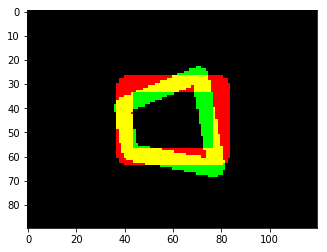

print inverse homographies


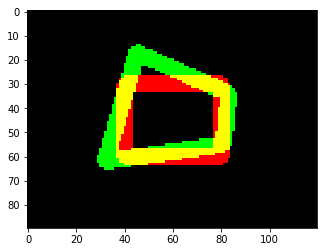

In [32]:
# homography visualization for my inplementation
print("homography visualization for my inplementation")

from utils.utils import warp_points_np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from utils.draw import drawBox
from utils.homographies import scale_homography

# sample homography
batch_size = 1
shape = np.array([2,2])
homographies = sample_homography_batches(config, batch_size, shape=shape, tf=False)
homographies_original = homographies.copy()

# change shapes
height, width = 30, 40
image_shape = np.array([height, width])
homographies = np.stack([scale_homography(H, image_shape, shift=(-1,-1)) for H in homographies])
print("homographies: ", homographies)

# warp points
# from utils.utils import warp_points_np
# corner_img = np.array([(0, 0), (height, 0), (height, width), (0, width)])
corner_img = np.array([(0, 0), (0, height), (width, height), (width, 0)])
points = warp_points_np(corner_img, homographies)

# plot shapes
offset = np.array([height,width])
img = np.zeros((height + offset[0]*2, width + offset[1]*2,3), np.uint8)
img = drawBox(corner_img, img, color=(255,0,0), offset=offset)
for i in range(points.shape[0]):
    img = drawBox(points[i,:,:], img, color=(0,255,0), offset=offset)
print("print forward homographies")
plt.imshow(img)
plt.show()

#  inv_homography
inv_homographies = np.stack([inv(H) for H in homographies])

# warp points
# from utils.utils import warp_points_np
# corner_img = np.array([(0, 0), (height, 0), (height, width), (0, width)])
corner_img = np.array([(0, 0), (0, height), (width, height), (width, 0)])
points = warp_points_np(corner_img, inv_homographies)

# plot shapes
offset = np.array([height,width])
img = np.zeros((height + offset[0]*2, width + offset[1]*2,3), np.uint8)
img = drawBox(corner_img, img, color=(255,0,0), offset=offset)
for i in range(points.shape[0]):
    img = drawBox(points[i,:,:], img, color=(0,255,0), offset=offset)
    
print("print inverse homographies")
plt.imshow(img)

plt.show()


In [58]:
H, W = 240, 320
cell_size = 8
Hc, Wc = H//cell_size, W//cell_size

device = 'cpu'

def get_coor_cells(Hc, Wc, cell_size, device='cpu', uv=False):
    coor_cells = torch.stack(torch.meshgrid(torch.arange(Hc), torch.arange(Wc)), dim=2)
    coor_cells = coor_cells.type(torch.FloatTensor).to(device)
    coor_cells = coor_cells.view(-1, 2)
    # change vu to uv
    if uv:
        coor_cells = torch.stack((coor_cells[:,1], coor_cells[:,0]), dim=1) # (y, x) to (x, y)

    return coor_cells.to(device)
coor_cells = get_coor_cells(Hc, Wc, cell_size=cell_size, device=device, uv=True)
print("coor_cells: ", coor_cells)
print("coor_cells: ", coor_cells.shape)

from utils.utils import filter_points
filtered_points, mask = filter_points(coor_cells, torch.tensor([Wc, Hc]), return_mask=True)


def warp_coor_cells_with_homographies(coor_cells, homographies, uv=False, device='cpu'):
    from utils.utils import warp_points
    # warped_coor_cells = warp_points(coor_cells.view([-1, 2]), homographies, device)
    # warped_coor_cells = normPts(coor_cells.view([-1, 2]), shape)
    warped_coor_cells = coor_cells
    if uv == False:
        warped_coor_cells = torch.stack((warped_coor_cells[:,1], warped_coor_cells[:,0]), dim=1) # (y, x) to (x, y)

    # print("homographies: ", homographies)
    warped_coor_cells = warp_points(warped_coor_cells, homographies, device)

    if uv == False:
        warped_coor_cells = torch.stack((warped_coor_cells[:, :, 1], warped_coor_cells[:, :, 0]), dim=2)  # (batch, x, y) to (batch, y, x)

    # shape_cell = torch.tensor([H//cell_size, W//cell_size]).type(torch.FloatTensor).to(device)
    # warped_coor_mask = denormPts(warped_coor_cells, shape_cell)

    return warped_coor_cells



matches_a = uvto1d(coor_cells, Hc)
print("matches_a: ", matches_a.shape)

matches_b = matches_a
print("matches_b: ", matches_b.shape)


coor_cells:  tensor([[ 0.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        ...,
        [37., 29.],
        [38., 29.],
        [39., 29.]])
coor_cells:  torch.Size([1200, 2])
matches_a:  torch.Size([2])
matches_b:  torch.Size([2])


In [59]:
match_loss, matches_a_descriptors, matches_b_descriptors = \
    PixelwiseContrastiveLoss.match_loss(image_a_pred, image_b_pred, matches_a.long(), matches_b.long())
print("match_loss: ", match_loss)
print("matches_a_descriptors: ", matches_a_descriptors.shape)
print("matches_b_descriptors: ", matches_b_descriptors.shape)

match_loss:  tensor(0.1613)
matches_a_descriptors:  torch.Size([1, 2, 3])
matches_b_descriptors:  torch.Size([1, 2, 3])


In [60]:
def create_non_matches(uv_a, uv_b_non_matches, multiplier):
    """
    Simple wrapper for repeated code
    :param uv_a:
    :type uv_a:
    :param uv_b_non_matches:
    :type uv_b_non_matches:
    :param multiplier:
    :type multiplier:
    :return:
    :rtype:
    """
    uv_a_long = (torch.t(uv_a[0].repeat(multiplier, 1)).contiguous().view(-1, 1),
                 torch.t(uv_a[1].repeat(multiplier, 1)).contiguous().view(-1, 1))

    uv_b_non_matches_long = (uv_b_non_matches[0].view(-1, 1), uv_b_non_matches[1].view(-1, 1))

    return uv_a_long, uv_b_non_matches_long

## update sparse loss function

In [61]:
# def descriptor_loss_sparse(descriptors, descriptors_warped, homographies, mask_valid=None,
#                            cell_size=8, device='cpu', descriptor_dist=4, lamda_d=250,
#                            num_matching_attempts=1000, num_masked_non_matches_per_match=10, **config):
#     """
#     consider batches of descriptors
#     :param descriptors:
#         Output from descriptor head
#         tensor [descriptors, Hc, Wc]
#     :param descriptors_warped:
#         Output from descriptor head of warped image
#         tensor [descriptors, Hc, Wc]
#     """

#     def uv_to_tuple(uv):
#         return (uv[:, 0], uv[:, 1])

#     def tuple_to_uv(uv_tuple):
#         return torch.stack([uv_tuple[0], uv_tuple[1]], dim=-1).squeeze()

#     def tuple_to_1d(uv_tuple, H):
#         return uv_tuple[0] * H + uv_tuple[1]

#     def uv_to_1d(points, H):
#         # assert points.dim == 2
#     #     print("points: ", points[0])
#     #     print("H: ", H)
#         return points[...,0]*H + points[...,1]

#     from utils.utils import filter_points
#     from utils.utils import crop_or_pad_choice

#     Hc, Wc = descriptors.shape[1], descriptors.shape[2]
#     img_shape = (Hc, Wc)
    
#     image_a_pred = descriptors.view(1, -1, Hc*Wc).transpose(1,2)  # torch [batch_size, H*W, D]
#     print("image_a_pred: ", image_a_pred.shape)
#     image_b_pred = descriptors_warped.view(1, -1, Hc*Wc).transpose(1,2)  # torch [batch_size, H*W, D]
#     print("image_a_pred: ", image_a_pred.shape)

#     # matches
#     ## sample points (implement sampling later)
#     ## warp points
#         # coor_cell
#     uv_a = get_coor_cells(Hc, Wc, cell_size, uv=True)
#     print("uv_a: ", uv_a.shape)
#         # warp coor_cell
# #     homographies_H = 
# #     homographies_H = np.stack([scale_homography_torch(homographies, image_shape, shift=(-1,-1)) for H in homographies])
#     homographies_H = scale_homography_torch(homographies, image_shape, shift=(-1,-1))
#     print("homographies_H: ", homographies_H)
    
#     uv_b_matches = warp_coor_cells_with_homographies(uv_a, homographies_H, uv=True)
#     uv_b_matches = uv_b_matches.squeeze(0)
#     print("uv_b_matches: ", uv_b_matches.shape)
#     print("uv_b_matches all: ", uv_b_matches)

#     # filtering!!!
#     # choice = crop_or_pad_choice(x_all.shape[0], self.sift_num, shuffle=True)

#     uv_b_matches, mask = filter_points(uv_b_matches, torch.tensor([Wc, Hc]), return_mask=True)

#     # batch the uv_a
#     # uv_a = uv_a.unsqueeze(0).repeat(batch_size, 1, 1)
#     uv_a = uv_a[mask]

#     # unsqueeze to batch
#     # if batch_size == 1:
#     #     uv_a = uv_a.unsqueeze(0)
#     #     uv_b_matches = uv_b_matches.unsqueeze(0)

#     # crop to the same length
#     print("shuffle = false")
#     choice = crop_or_pad_choice(uv_b_matches.shape[0], num_matching_attempts, shuffle=False)
#     choice = torch.tensor(choice)
#     uv_a =         uv_a[choice]
#     uv_b_matches = uv_b_matches[choice]

#     matches_a = uv_to_1d(uv_a, Hc)
#     print("matches_a: ", matches_a.shape)
#     matches_b = uv_to_1d(uv_b_matches, Hc)
#     print("matches_b: ", matches_b.shape)
# #     print("matches_b max: ", matches_b.max())

#     # matches_a = matches_a.squeeze()
#     # matches_b = matches_b.squeeze()
#     # matches_a = matches_a[0, ...]
#     # matches_b = matches_b[0, ...]


#     ## select from descriptor
#     # def get_match_loss
#     ## calculate matches loss
#     def get_match_loss(image_a_pred, image_b_pred, matches_a, matches_b):
#         match_loss, matches_a_descriptors, matches_b_descriptors = \
#             PixelwiseContrastiveLoss.match_loss(image_a_pred, image_b_pred, matches_a.long(), matches_b.long())
#         print("matches_a_descriptors: ", matches_a_descriptors.shape)
#         return match_loss

#     # batch_match_loss = torch.stack([get_match_loss(image_a_pred[i], image_b_pred[i], matches_a[i], matches_b[i])
#     #                                          for i in range(batch_size)])

#     match_loss = get_match_loss(image_a_pred, image_b_pred, matches_a, matches_b)

#     # non matches

#     def get_non_matches_corr(img_b_shape, uv_a, uv_b_matches, num_masked_non_matches_per_match=10):
#         ## sample non matches
#         uv_b_matches = uv_b_matches.squeeze()
#         uv_b_matches_tuple = uv_to_tuple(uv_b_matches)
#     #     print("uv_b_matches ", uv_b_matches.shape)
# #         print("img_b_shape ", img_b_shape)
#         uv_b_non_matches_tuple = correspondence_finder.create_non_correspondences(uv_b_matches_tuple,
#                         img_b_shape, num_non_matches_per_match=num_masked_non_matches_per_match, img_b_mask=None)

#         ## create_non_correspondences
# #         print("uv_a: ", uv_to_tuple(uv_a))
# #         print("uv_b_non_matches: ", uv_b_non_matches)
#     #     print("uv_b_non_matches: ", tensorUv2tuple(uv_b_non_matches))
#         uv_a_tuple, uv_b_non_matches_tuple = \
#             create_non_matches(uv_to_tuple(uv_a), uv_b_non_matches_tuple, num_masked_non_matches_per_match)
#         return uv_a_tuple, uv_b_non_matches_tuple


#     def get_non_match_loss(image_a_pred, image_b_pred, non_matches_a, non_matches_b):
#         ## non matches loss
#         non_match_loss, num_hard_negatives, non_matches_a_descriptors, non_matches_b_descriptors = \
#                         PixelwiseContrastiveLoss.non_match_descriptor_loss(image_a_pred, image_b_pred,
#                                                    non_matches_a.long().squeeze(), non_matches_b.long().squeeze())
#         return non_match_loss

#     # get non matches correspondence
#     uv_a_tuple, uv_b_non_matches_tuple = get_non_matches_corr(img_shape,
#                                      uv_a, uv_b_matches,
#                                      num_masked_non_matches_per_match=num_masked_non_matches_per_match)

#     non_matches_a = tuple_to_1d(uv_a_tuple, Hc)
#     non_matches_b = tuple_to_1d(uv_b_non_matches_tuple, Hc)

# #     print("non_matches_a: ", non_matches_a)
# #     print("non_matches_b: ", non_matches_b)

#     non_match_loss = get_non_match_loss(image_a_pred, image_b_pred, non_matches_a, non_matches_a)
#     non_match_loss = non_match_loss.mean()

#     # batch_non_match_loss = []
#     # for i in range(batch_size):
#     #     # get non matches correspondence
#     #     uv_a_tuple, uv_b_non_matches_tuple = get_non_matches_corr(img_b_shape,
#     #                                      batch_uv_a[i], uv_b_non_matches[i],
#     #                                      num_masked_non_matches_per_match=num_masked_non_matches_per_match)
#     #
#     #     non_matches_a = tuple_to_1d(uv_a_tuple, Hc)
#     #     non_matches_b = tuple_to_1d(uv_b_non_matches_tuple, Hc)
#     #
#     #     print("non_matches_a: ", non_matches_a)
#     #     print("non_matches_b: ", non_matches_b)
#     #
#     #     non_match_loss = torch.stack([get_non_match_loss(image_a_pred[i], image_b_pred[i],
#     #                                          non_matches_a[i], non_matches_a[i])
#     #                                          for i in range(batch_size)])
#     #     batch_non_match_loss.append(non_match_loss)

#     # batch_match_loss = batch_match_loss.mean()
#     # batch_non_match_loss = torch.stack(batch_non_match_loss).mean()

#     loss = lamda_d*match_loss + non_match_loss
#     print("plot matches and non matches")
#     return uv_a, uv_b_matches, tuple_to_uv(uv_a_tuple), tuple_to_uv(uv_b_non_matches_tuple)
# #     return uv_a, uv_b_matches
# #     return loss
#     pass






## New version

In [64]:
def descriptor_loss_sparse(descriptors, descriptors_warped, homographies, mask_valid=None,
                           cell_size=8, device='cpu', descriptor_dist=4, lamda_d=250,
                           num_matching_attempts=1000, num_masked_non_matches_per_match=10, 
                           dist='cos', **config):
    """
    consider batches of descriptors
    :param descriptors:
        Output from descriptor head
        tensor [descriptors, Hc, Wc]
    :param descriptors_warped:
        Output from descriptor head of warped image
        tensor [descriptors, Hc, Wc]
    """

    def uv_to_tuple(uv):
        return (uv[:, 0], uv[:, 1])

    def tuple_to_uv(uv_tuple):
        return torch.stack([uv_tuple[0], uv_tuple[1]])

    def tuple_to_1d(uv_tuple, H):
        return uv_tuple[0] * H + uv_tuple[1]

    def uv_to_1d(points, H):
        # assert points.dim == 2
        #     print("points: ", points[0])
        #     print("H: ", H)
        return points[..., 0] * H + points[..., 1]

    ## calculate matches loss
    def get_match_loss(image_a_pred, image_b_pred, matches_a, matches_b, dist='cos'):
        match_loss, matches_a_descriptors, matches_b_descriptors = \
            PixelwiseContrastiveLoss.match_loss(image_a_pred, image_b_pred, 
                matches_a.long(), matches_b.long(), dist=dist)
        return match_loss

    def get_non_matches_corr(img_b_shape, uv_a, uv_b_matches, num_masked_non_matches_per_match=10, device='cpu'):
        ## sample non matches
        uv_b_matches = uv_b_matches.squeeze()
        uv_b_matches_tuple = uv_to_tuple(uv_b_matches)
        uv_b_non_matches_tuple = correspondence_finder.create_non_correspondences(uv_b_matches_tuple,
                                        img_b_shape, num_non_matches_per_match=num_masked_non_matches_per_match,
                                        img_b_mask=None)

        ## create_non_correspondences
        #     print("img_b_shape ", img_b_shape)
        #     print("uv_b_matches ", uv_b_matches.shape)
        # print("uv_a: ", uv_to_tuple(uv_a))
        # print("uv_b_non_matches: ", uv_b_non_matches)
        #     print("uv_b_non_matches: ", tensorUv2tuple(uv_b_non_matches))
        uv_a_tuple, uv_b_non_matches_tuple = \
            create_non_matches(uv_to_tuple(uv_a), uv_b_non_matches_tuple, num_masked_non_matches_per_match)
        return uv_a_tuple, uv_b_non_matches_tuple

    def get_non_match_loss(image_a_pred, image_b_pred, non_matches_a, non_matches_b, dist='cos'):
        ## non matches loss
        non_match_loss, num_hard_negatives, non_matches_a_descriptors, non_matches_b_descriptors = \
            PixelwiseContrastiveLoss.non_match_descriptor_loss(image_a_pred, image_b_pred,
                                                               non_matches_a.long().squeeze(),
                                                               non_matches_b.long().squeeze(),
                                                               M=0.2, invert=True, dist=dist)
        non_match_loss = non_match_loss.sum()/(num_hard_negatives + 1)
        return non_match_loss

    from utils.utils import filter_points
    from utils.utils import crop_or_pad_choice

    # ##### print configs
    # print("num_masked_non_matches_per_match: ", num_masked_non_matches_per_match)
    # print("num_matching_attempts: ", num_matching_attempts)
    # dist = 'cos'

    Hc, Wc = descriptors.shape[1], descriptors.shape[2]
    img_shape = (Hc, Wc)
    # print("img_shape: ", img_shape)
    # img_shape_cpu = (Hc.to('cpu'), Wc.to('cpu'))

    image_a_pred = descriptors.view(1, -1, Hc * Wc).transpose(1, 2)  # torch [batch_size, H*W, D]
    # print("image_a_pred: ", image_a_pred.shape)
    image_b_pred = descriptors_warped.view(1, -1, Hc * Wc).transpose(1, 2)  # torch [batch_size, H*W, D]

    # matches
    uv_a = get_coor_cells(Hc, Wc, cell_size, uv=True, device='cpu')
    # print("uv_a: ", uv_a[0])

    homographies_H = scale_homography_torch(homographies, img_shape, shift=(-1, -1))

    # print("experiment inverse homographies")
    # homographies_H = torch.stack([torch.inverse(H) for H in homographies_H])
    # print("homographies_H: ", homographies_H.shape)
    # homographies_H = torch.inverse(homographies_H)


    uv_b_matches = warp_coor_cells_with_homographies(uv_a, homographies_H.to('cpu'), uv=True, device='cpu')
    # 
    # print("uv_b_matches before round: ", uv_b_matches[0])

    uv_b_matches.round_() 
    # print("uv_b_matches after round: ", uv_b_matches[0])
    uv_b_matches = uv_b_matches.squeeze(0)


    # filtering out of range points
    # choice = crop_or_pad_choice(x_all.shape[0], self.sift_num, shuffle=True)

    uv_b_matches, mask = filter_points(uv_b_matches, torch.tensor([Wc, Hc]).to(device='cpu'), return_mask=True)
    print ("pos mask sum: ", mask.sum())
    uv_a = uv_a[mask]

    # crop to the same length
    choice = crop_or_pad_choice(uv_b_matches.shape[0], num_matching_attempts, shuffle=True)
    choice = torch.tensor(choice)
    uv_a = uv_a[choice]
    uv_b_matches = uv_b_matches[choice]

    matches_a = uv_to_1d(uv_a, Hc)
    matches_b = uv_to_1d(uv_b_matches, Hc)

    # print("matches_a: ", matches_a.shape)
    # print("matches_b: ", matches_b.shape)
    # print("matches_b max: ", matches_b.max())

    match_loss = get_match_loss(image_a_pred, image_b_pred, matches_a.to(device), matches_b.to(device), dist=dist)

    # non matches

    # get non matches correspondence
    uv_a_tuple, uv_b_non_matches_tuple = get_non_matches_corr(img_shape,
                                            uv_a, uv_b_matches,
                                            num_masked_non_matches_per_match=num_masked_non_matches_per_match)

    non_matches_a = tuple_to_1d(uv_a_tuple, Hc)
    non_matches_b = tuple_to_1d(uv_b_non_matches_tuple, Hc)

    # print("non_matches_a: ", non_matches_a)
    # print("non_matches_b: ", non_matches_b)

    non_match_loss = get_non_match_loss(image_a_pred, image_b_pred, non_matches_a.to(device),
                                        non_matches_b.to(device), dist=dist)
    # non_match_loss = non_match_loss.mean()

    loss = lamda_d * match_loss + non_match_loss
    return uv_a, uv_b_matches, tuple_to_uv(uv_a_tuple), tuple_to_uv(uv_b_non_matches_tuple)
    
#     return loss, lamda_d * match_loss, non_match_loss
    pass

In [65]:
print("homographies_original: ", homographies_original)

descriptors = torch.tensor(np.random.rand(1, D, Hc, Wc), dtype=torch.float32)
print("descriptors: ", descriptors.shape)
descriptors_warped = torch.tensor(np.random.rand(1, D, Hc, Wc), dtype=torch.float32)
descriptor_loss = descriptor_loss_sparse(descriptors[0], descriptors_warped[0], torch.tensor(homographies_original[0], dtype=torch.float32))
print("descriptor_loss: ", descriptor_loss)
descriptor_loss = descriptor_loss_sparse(descriptors[0], descriptors[0], torch.tensor(homographies_original[0], dtype=torch.float32))
print("descriptor_loss test same input: ", descriptor_loss)

homographies_original:  [[[ 8.90293106e-01  1.14502809e-01 -3.78152032e-01]
  [-1.67689912e-01  8.70181362e-01  2.02139527e-01]
  [-3.31674577e-01  6.42878985e-09  1.00000000e+00]]]
descriptors:  torch.Size([1, 3, 30, 40])
pos mask sum:  tensor(1130)
descriptor_loss:  (tensor([[13.,  7.],
        [32., 20.],
        [33., 14.],
        ...,
        [ 2., 17.],
        [18., 28.],
        [13., 16.]]), tensor([[ 7., 12.],
        [25., 22.],
        [25., 16.],
        ...,
        [ 2., 20.],
        [13., 29.],
        [ 8., 19.]]), tensor([[[13.],
         [13.],
         [13.],
         ...,
         [13.],
         [13.],
         [13.]],

        [[ 7.],
         [ 7.],
         [ 7.],
         ...,
         [16.],
         [16.],
         [16.]]]), tensor([[[26.],
         [35.],
         [12.],
         ...,
         [23.],
         [ 0.],
         [11.]],

        [[26.],
         [17.],
         [18.],
         ...,
         [16.],
         [27.],
         [21.]]]))
pos mask s

## visualize one pixel's matching and non matching

In [66]:
from utils.draw import draw_matches
from utils.homographies import scale_homography_torch

uv_a, uv_b_matches, uv_a_non_matches, uv_b_non_matches  = descriptor_loss_sparse(descriptors[0], 
            descriptors_warped[0], torch.tensor(homographies_original[0], dtype=torch.float32))
rgb1 = descriptors[0,0,:,:]
rgb2 = descriptors_warped[0,0,:,:]



pos mask sum:  tensor(1130)


In [67]:
print("uv_a: ", uv_a.shape)
match_pairs = torch.cat((uv_a, uv_b_matches), dim=1)
print("match_pairs: ", match_pairs.shape)


uv_a:  torch.Size([1000, 2])
match_pairs:  torch.Size([1000, 4])


#Matches = 500


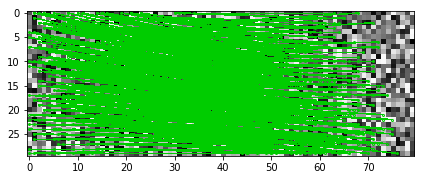

In [69]:
samples_s = 500
samples_e = 1000
draw_matches(rgb1.numpy(), rgb2.numpy(), match_pairs[samples_s:samples_e].numpy(), filename='matches.png', show=True)

In [26]:
print("uv_a_non_matches: ", uv_a_non_matches.shape)
match_pairs = torch.cat((uv_a_non_matches, uv_b_non_matches), dim=1)
print("match_pairs: ", match_pairs.shape)


uv_a_non_matches:  torch.Size([10000, 2])
match_pairs:  torch.Size([10000, 4])


In [ ]:
samples = 100
draw_matches(rgb1.numpy(), rgb2.numpy(), match_pairs[:samples].numpy(), filename='matches.png', show=True)

In [ ]:
print("homographies: ", homographies.shape)

In [ ]:
uv_a_masked_long, uv_b_masked_non_matches_long = \
        self.create_non_matches(matches_1, matches_2_masked_non_matches, self.num_masked_non_matches_per_match)

In [ ]:
matches_a.long().type()

In [ ]:
def compute_loss_on_dataset(dcn, data_loader, loss_config, num_iterations=500,):
    """

    Computes the loss for the given number of iterations

    :param dcn:
    :type dcn:
    :param data_loader:
    :type data_loader:
    :param num_iterations:
    :type num_iterations:
    :return:
    :rtype:
    """
    dcn.eval()

    # loss_vec = np.zeros(num_iterations)
    loss_vec = []
    match_loss_vec = []
    non_match_loss_vec = []
    counter = 0
    pixelwise_contrastive_loss = PixelwiseContrastiveLoss(dcn.image_shape, config=loss_config)

    batch_size = 1

    for i, data in enumerate(data_loader, 0):

        # get the inputs
        data_type, img_a, img_b, matches_a, matches_b, non_matches_a, non_matches_b, metadata = data
        data_type = data_type[0]

        if len(matches_a[0]) == 0:
            print ("didn't have any matches, continuing")
            continue

        img_a = Variable(img_a.cuda(), requires_grad=False)
        img_b = Variable(img_b.cuda(), requires_grad=False)

        if data_type == "matches":
            matches_a = Variable(matches_a.cuda().squeeze(0), requires_grad=False)
            matches_b = Variable(matches_b.cuda().squeeze(0), requires_grad=False)
            non_matches_a = Variable(non_matches_a.cuda().squeeze(0), requires_grad=False)
            non_matches_b = Variable(non_matches_b.cuda().squeeze(0), requires_grad=False)

        # run both images through the network
        image_a_pred = dcn.forward(img_a)
        image_a_pred = dcn.process_network_output(image_a_pred, batch_size)

        image_b_pred = dcn.forward(img_b)
        image_b_pred = dcn.process_network_output(image_b_pred, batch_size)

        # get loss
        if data_type == "matches":
            loss, match_loss, non_match_loss = \
                pixelwise_contrastive_loss.get_loss(image_a_pred,
                                                    image_b_pred,
                                                    matches_a,
                                                    matches_b,
                                                    non_matches_a,
                                                    non_matches_b)



            loss_vec.append(loss.data[0])
            non_match_loss_vec.append(non_match_loss.data[0])
            match_loss_vec.append(match_loss.data[0])


        if i > num_iterations:
            break

    loss_vec = np.array(loss_vec)
    match_loss_vec = np.array(match_loss_vec)
    non_match_loss_vec = np.array(non_match_loss_vec)

    loss = np.average(loss_vec)
    match_loss = np.average(match_loss_vec)
    non_match_loss = np.average(non_match_loss_vec)

    return loss, match_loss, non_match_loss
